Q-1. Imagine you have a dataset where you have different Instagram features
like u sername , Caption , Hashtag , Followers , Time_Since_posted , and likes , now your task is
to predict the number of likes and Time Since posted and the rest of the features are
your input features. Now you have to build a model which can predict the
number of likes and Time Since posted.
Dataset This is the Dataset You can use this dataset for this question.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("instagram_reach.csv")

In [3]:
data.head()

,Unnamed: 0,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,0,1,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139
1,1,2,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2 hours,23
2,2,3,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2 hours,25
3,3,4,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3 hours,49
4,4,5,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3 hours,30


In [4]:
data.shape

(100, 8)

In [5]:
data.drop(["Unnamed: 0","S.No","USERNAME"],axis=1,inplace=True)

In [6]:
data.head()

,Caption,Followers,Hashtags,Time since posted,Likes
0,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139
1,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2 hours,23
2,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2 hours,25
3,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3 hours,49
4,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3 hours,30


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Caption            94 non-null     object
 1   Followers          100 non-null    int64 
 2   Hashtags           100 non-null    object
 3   Time since posted  100 non-null    object
 4   Likes              100 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 4.0+ KB


In [8]:
data["Time since posted"] = data["Time since posted"].apply(lambda x:x.replace("hours","")).astype(float)

In [9]:
from sklearn.preprocessing import LabelEncoder
lable = LabelEncoder()
cato = ["Caption","Hashtags"]
for i in cato:
    data[i] = lable.fit_transform(data[i])

In [10]:
x = data.drop(["Time since posted","Likes"],axis=1)
y = data[["Time since posted","Likes"]]

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [13]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [15]:
def model_evaluation(test,pread):
    mse = mean_squared_error(test,pread)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(test,pread)
    r2 = r2_score(test,pread)
    
    return mse,rmse,mae,r2

In [16]:
forest = RandomForestRegressor()
forest.fit(X_train,y_train)

RandomForestRegressor()

In [20]:
forest.score(X_train,y_train)

0.8257375855677486

In [21]:
ypred = forest.predict(X_test)

In [22]:
model_evaluation(y_test,ypred)

(564.04992, 23.749735156418062, 12.605499999999996, 0.16639264875179394)

Q-2. Imagine you have a dataset where you have different features like Age ,
Gender , Height , Weight , BMI , and Blood Pressure and you have to classify the people into
different classes like Normal , Overweight , Obesity , Underweight , and Extreme Obesity by using
any 4 different classification algorithms. Now you have to build a model which
can classify people into different classes.
Dataset This is the Dataset You can use this dataset for this question.

In [23]:
data = pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv")

In [24]:
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [25]:
data.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [26]:
data.duplicated().sum()

24

In [27]:
data.drop_duplicates(inplace=True)

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2087 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2087 non-null   object 
 1   Age                             2087 non-null   float64
 2   Height                          2087 non-null   float64
 3   Weight                          2087 non-null   float64
 4   family_history_with_overweight  2087 non-null   object 
 5   FAVC                            2087 non-null   object 
 6   FCVC                            2087 non-null   float64
 7   NCP                             2087 non-null   float64
 8   CAEC                            2087 non-null   object 
 9   SMOKE                           2087 non-null   object 
 10  CH2O                            2087 non-null   float64
 11  SCC                             2087 non-null   object 
 12  FAF                             20

In [30]:
catigorical_features = data.select_dtypes(include="object").columns
numerical_features = data.select_dtypes(exclude="object").columns
print(catigorical_features)
print(numerical_features)

Index(['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE',
       'SCC', 'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')
Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE'], dtype='object')


<Axes: ylabel='NObeyesdad'>

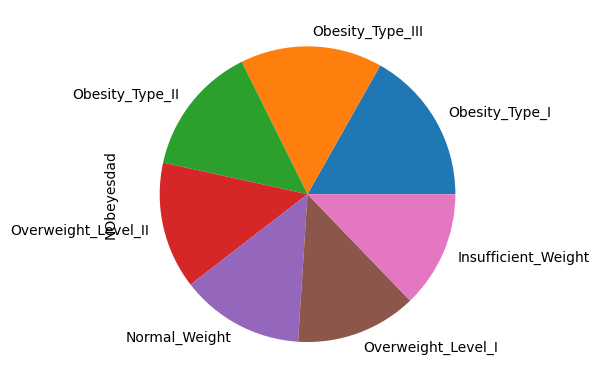

In [31]:
data['NObeyesdad'].value_counts().plot.pie()

In [32]:
from sklearn.preprocessing import LabelEncoder
lable = LabelEncoder()

for i in catigorical_features:
    data[i] = lable.fit_transform(data[i])

<Axes: >

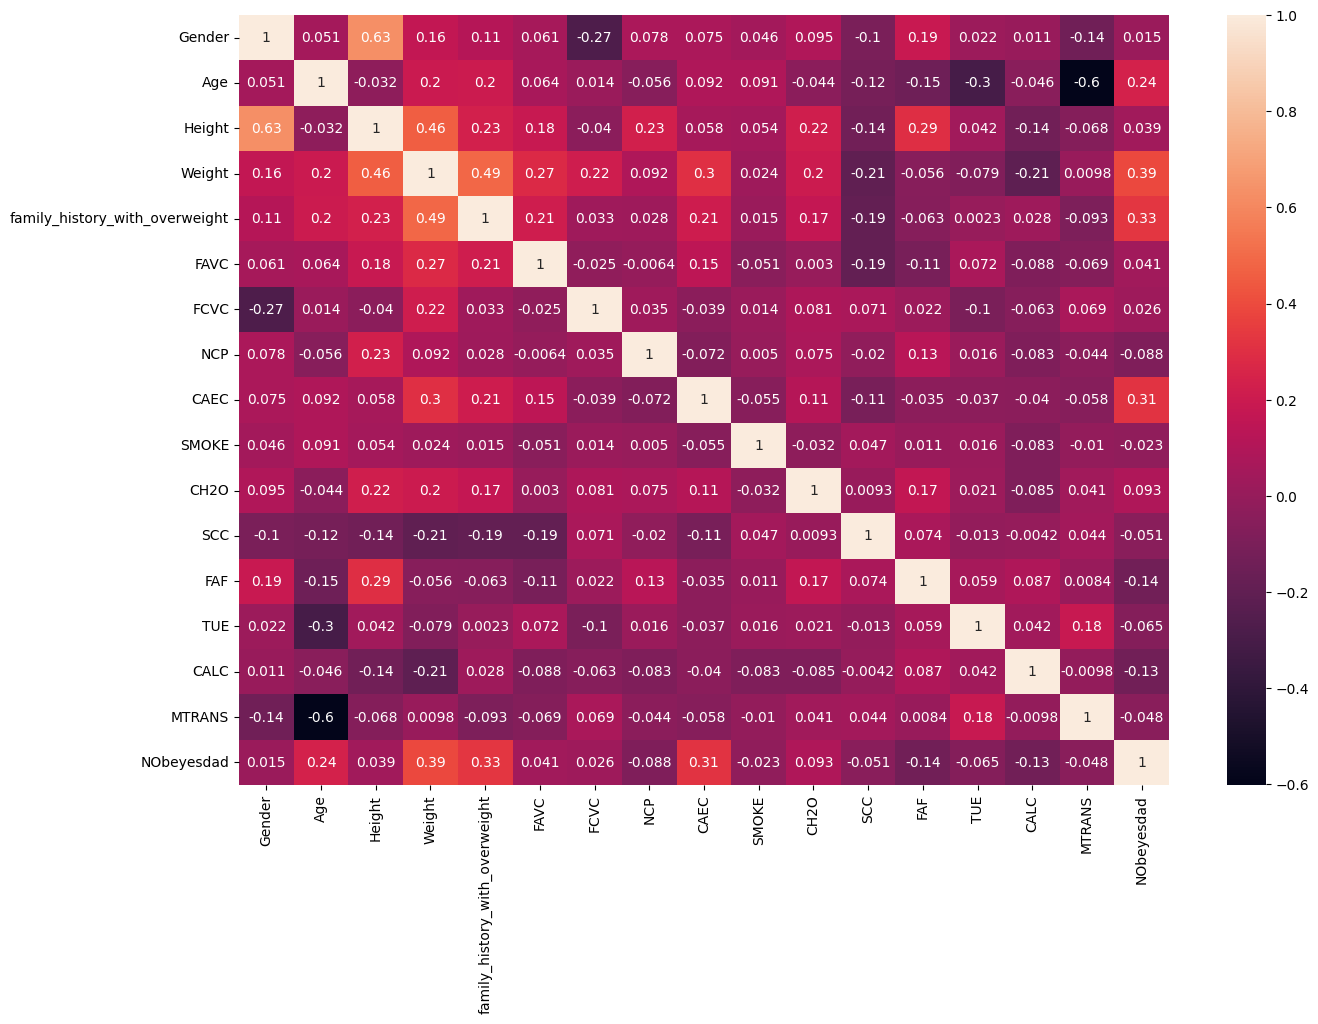

In [33]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True)

In [34]:
x = data.drop('NObeyesdad',axis=1)
y = data['NObeyesdad']

In [35]:
catigorical_features = x.select_dtypes(include="object").columns
numerical_features = x.select_dtypes(exclude="object").columns
print(catigorical_features)
print(numerical_features)

Index([], dtype='object')
Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS'],
      dtype='object')


In [36]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [37]:
num_pipline = Pipeline(
    steps=[
        ("imputer",SimpleImputer(strategy="median")),
        ("scaler",StandardScaler())
    ]
)

cato_pipline = Pipeline(
    steps=[
        ("imputer",SimpleImputer(strategy="most_frequent")),
        ("scaler",StandardScaler())
    ]
)

# Create Preprocessor object
preprocessor = ColumnTransformer([
    ("num_pipline",num_pipline,numerical_features),
    ("cato_pipline",cato_pipline,catigorical_features)
])

In [38]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)

In [39]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [40]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [43]:
logistic = LogisticRegression(class_weight="balanced")
logistic.fit(X_train,y_train)

LogisticRegression(class_weight='balanced')

In [44]:
logistic.score(X_train,y_train)

0.8939484721390054

In [45]:
y_pred = logistic.predict(X_test)

In [46]:
accuracy_score(y_test,y_pred)

0.868421052631579

In [47]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.95      0.88        59
           1       0.87      0.64      0.74        61
           2       0.93      0.90      0.91        70
           3       0.97      1.00      0.98        64
           4       1.00      1.00      1.00        60
           5       0.73      0.75      0.74        55
           6       0.73      0.82      0.77        49

    accuracy                           0.87       418
   macro avg       0.86      0.86      0.86       418
weighted avg       0.87      0.87      0.87       418



In [48]:
# Support Vector mechine
svm = SVC(C=10)
svm.fit(X_train,y_train)

SVC(C=10)

In [49]:
svm.score(X_train,y_train)

0.9988016776512882

In [50]:
y_pred = svm.predict(X_test)

In [51]:
accuracy_score(y_test,y_pred)

0.9114832535885168

In [52]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.88      0.91        59
           1       0.74      0.85      0.79        61
           2       0.96      0.94      0.95        70
           3       0.98      0.98      0.98        64
           4       1.00      1.00      1.00        60
           5       0.86      0.78      0.82        55
           6       0.90      0.92      0.91        49

    accuracy                           0.91       418
   macro avg       0.91      0.91      0.91       418
weighted avg       0.91      0.91      0.91       418



In [53]:
# Decision Tree
tree = DecisionTreeClassifier(max_depth=10,class_weight="balanced",min_samples_split=5)
tree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=10,
                       min_samples_split=5)

In [54]:
tree.score(X_train,y_train)

0.982025164769323

In [55]:
y_pred = tree.predict(X_test)

In [56]:
accuracy_score(y_test,y_pred)

0.9090909090909091

In [57]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92        59
           1       0.79      0.67      0.73        61
           2       0.95      0.99      0.97        70
           3       0.98      0.97      0.98        64
           4       1.00      1.00      1.00        60
           5       0.77      0.80      0.79        55
           6       0.96      0.98      0.97        49

    accuracy                           0.91       418
   macro avg       0.91      0.91      0.91       418
weighted avg       0.91      0.91      0.91       418



In [58]:
# RandomForest
forest = RandomForestClassifier(n_estimators=200,max_depth=10,class_weight="balanced",min_samples_split=5)
forest.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_split=5, n_estimators=200)

In [59]:
forest.score(X_train,y_train)

0.9988016776512882

In [60]:
y_pred = forest.predict(X_test)

In [61]:
accuracy_score(y_test,y_pred)

0.9617224880382775

In [62]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.93      0.96        59
           1       0.88      0.93      0.90        61
           2       1.00      0.96      0.98        70
           3       1.00      1.00      1.00        64
           4       1.00      1.00      1.00        60
           5       0.94      0.91      0.93        55
           6       0.92      1.00      0.96        49

    accuracy                           0.96       418
   macro avg       0.96      0.96      0.96       418
weighted avg       0.96      0.96      0.96       418



Q-3. Imagine you have a dataset where you have different categories of data, Now
you need to find the most similar data to the given data by using any 4 different
similarity algorithms. Now you have to build a model which can find the most similar
data to the given data.
Dataset This is the Dataset You can use this dataset for this question.

In [67]:
import json
with open('News_Category_Dataset_v3.json','r') as f:
    jdata = f.read()

jdata2  = [json.loads(line) for line in jdata.split('\n') if line]
df = pd.DataFrame.from_records(jdata2)

In [68]:
df

,link,headline,category,short_description,authors,date
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22
...,...,...,...,...,...,...
209522,https://www.huffingtonpost.com/entry/rim-ceo-t...,RIM CEO Thorsten Heins' 'Significant' Plans Fo...,TECH,Verizon Wireless and AT&T are already promotin...,"Reuters, Reuters",2012-01-28
209523,https://www.huffingtonpost.com/entry/maria-sha...,Maria Sharapova Stunned By Victoria Azarenka I...,SPORTS,"Afterward, Azarenka, more effusive with the pr...",,2012-01-28
209524,https://www.huffingtonpost.com/entry/super-bow...,"Giants Over Patriots, Jets Over Colts Among M...",SPORTS,"Leading up to Super Bowl XLVI, the most talked...",,2012-01-28
209525,https://www.huffingtonpost.com/entry/aldon-smi...,Aldon Smith Arrested: 49ers Linebacker Busted ...,SPORTS,CORRECTION: An earlier version of this story i...,,2012-01-28


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209527 entries, 0 to 209526
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   link               209527 non-null  object
 1   headline           209527 non-null  object
 2   category           209527 non-null  object
 3   short_description  209527 non-null  object
 4   authors            209527 non-null  object
 5   date               209527 non-null  object
dtypes: object(6)
memory usage: 9.6+ MB


In [70]:
df.duplicated().sum()

13

In [71]:
df.isnull().sum()
df['category'].value_counts()

POLITICS          35602
WELLNESS          17945
ENTERTAINMENT     17362
TRAVEL             9900
STYLE & BEAUTY     9814
PARENTING          8791
HEALTHY LIVING     6694
QUEER VOICES       6347
FOOD & DRINK       6340
BUSINESS           5992
COMEDY             5400
SPORTS             5077
BLACK VOICES       4583
HOME & LIVING      4320
PARENTS            3955
THE WORLDPOST      3664
WEDDINGS           3653
WOMEN              3572
CRIME              3562
IMPACT             3484
DIVORCE            3426
WORLD NEWS         3299
MEDIA              2944
WEIRD NEWS         2777
GREEN              2622
WORLDPOST          2579
RELIGION           2577
STYLE              2254
SCIENCE            2206
TECH               2104
TASTE              2096
MONEY              1756
ARTS               1509
ENVIRONMENT        1444
FIFTY              1401
GOOD NEWS          1398
U.S. NEWS          1377
ARTS & CULTURE     1339
COLLEGE            1144
LATINO VOICES      1130
CULTURE & ARTS     1074
EDUCATION       

,link,headline,category,short_description,authors,date,description
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23,Over 4 Million Americans Roll Up Sleeves For O...
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23,"American Airlines Flyer Charged, Banned For Li..."
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23,23 Of The Funniest Tweets About Cats And Dogs ...
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23,The Funniest Tweets From Parents This Week (Se...
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22,Woman Who Called Cops On Black Bird-Watcher Lo...


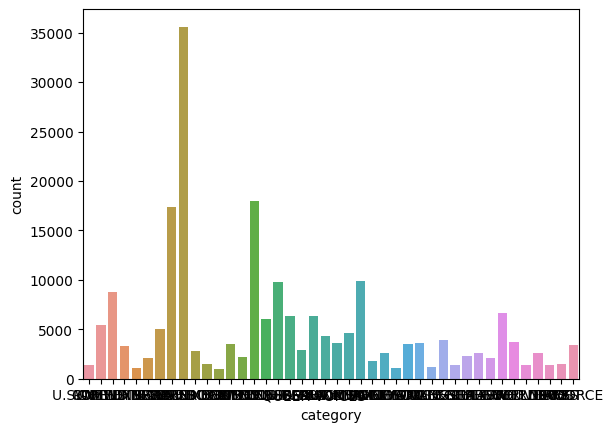

In [72]:
sns.countplot(data = df , x = 'category')
df.drop_duplicates(inplace=True)
df['description'] = df['headline'] +' '+df['category']+' '+df['short_description']
df.head()

Q-4. Imagine you working as a sale manager now you need to predict the Revenue
and whether that particular revenue is on the weekend or not and find the
Informational_Duration using the Ensemble learning algorithm
Dataset This is the Dataset You can use this dataset for this question.

In [73]:
data = pd.read_csv("online_shoppers_intention.csv")

In [74]:
data

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


In [75]:
data.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [76]:
data.duplicated().sum()

125

In [77]:
data.drop_duplicates(inplace=True)

In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12205 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12205 non-null  int64  
 1   Administrative_Duration  12205 non-null  float64
 2   Informational            12205 non-null  int64  
 3   Informational_Duration   12205 non-null  float64
 4   ProductRelated           12205 non-null  int64  
 5   ProductRelated_Duration  12205 non-null  float64
 6   BounceRates              12205 non-null  float64
 7   ExitRates                12205 non-null  float64
 8   PageValues               12205 non-null  float64
 9   SpecialDay               12205 non-null  float64
 10  Month                    12205 non-null  object 
 11  OperatingSystems         12205 non-null  int64  
 12  Browser                  12205 non-null  int64  
 13  Region                   12205 non-null  int64  
 14  TrafficType           

In [79]:
data["Revenue"] = data["Revenue"].map({True:1,False:0})
data['Weekend'] = data['Weekend'].map({True:1,False:0})

In [80]:
catigorical_features = data.select_dtypes(include="object").columns
numerical_features = data.select_dtypes(exclude="object").columns
print(catigorical_features)
print(numerical_features)

Index(['Month', 'VisitorType'], dtype='object')
Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Weekend',
       'Revenue'],
      dtype='object')


In [81]:
from sklearn.preprocessing import LabelEncoder
lable = LabelEncoder()

for i in catigorical_features:
    data[i] = lable.fit_transform(data[i])

<Axes: >

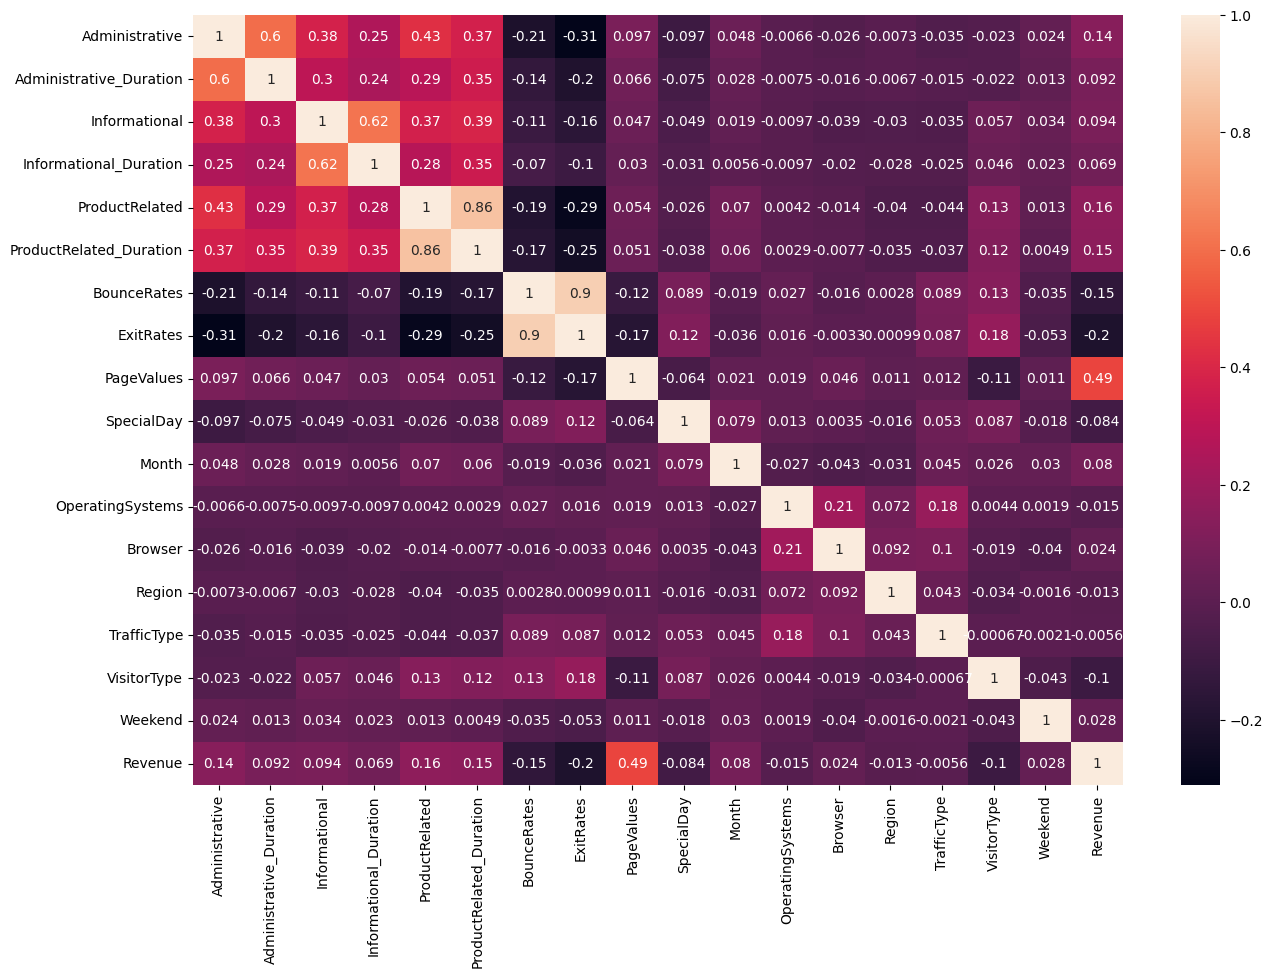

In [82]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True)

In [83]:
x = data.drop("Revenue",axis=1)
y = data["Revenue"]

In [84]:
catigorical_features = x.select_dtypes(include="object").columns
numerical_features = x.select_dtypes(exclude="object").columns
print(catigorical_features)
print(numerical_features)

Index([], dtype='object')
Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend'],
      dtype='object')


In [85]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [86]:
## Numerical Pipline
num_pipline = Pipeline(
    steps=[
        ("imputer",SimpleImputer(strategy="median")),
        ("scaler",StandardScaler())
    ]
)

cato_pipline = Pipeline(
    steps=[
        ("imputer",SimpleImputer(strategy="most_frequent")),
        ("scaler",StandardScaler())
    ]
)

# Create Preprocessor object
preprocessor = ColumnTransformer([
    ("num_pipline",num_pipline,numerical_features),
    ("cato_pipline",cato_pipline,catigorical_features)
])

In [87]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)

In [88]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [89]:
# RandomForest
forest = RandomForestClassifier(n_estimators=250,max_depth=15,class_weight="balanced",min_samples_split=6)
forest.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=15,
                       min_samples_split=6, n_estimators=250)

In [90]:
forest.score(X_train,y_train)

0.9693773043834494

In [91]:
y_pred = forest.predict(X_test)

In [92]:
accuracy_score(y_test,y_pred)

0.8934862761163458

In [93]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      2079
           1       0.64      0.65      0.64       362

    accuracy                           0.89      2441
   macro avg       0.79      0.79      0.79      2441
weighted avg       0.89      0.89      0.89      2441



In [94]:
from sklearn.ensemble import BaggingClassifier
bagging = BaggingClassifier(n_estimators=50)
bagging.fit(X_train,y_train)

BaggingClassifier(n_estimators=50)

In [95]:
bagging.score(X_train,y_train)

0.9993854977468251

In [96]:
y_pred = bagging.predict(X_test)

In [97]:
accuracy_score(y_test,y_pred)

0.9008603031544449

In [98]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94      2079
           1       0.71      0.56      0.63       362

    accuracy                           0.90      2441
   macro avg       0.82      0.76      0.78      2441
weighted avg       0.89      0.90      0.90      2441



Q-5. Uber is a taxi service provider as we know, we need to predict the high
booking area using an Unsupervised algorithm and price for the location using a
supervised algorithm and use some map function to display the data
Dataset This is the Dataset You can use this dataset for this question.

In [99]:
data = pd.read_csv("rideshare_kaggle.csv")
sns.set(rc={"figure.figsize":(11,8)})
pd.pandas.set_option("display.max_columns",None)

In [100]:
data.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.2148,-71.033,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,1544962084,1544994864,0.30,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1.544958e+09
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,42.2148,-71.033,43.58,37.35,Rain,"Rain until morning, starting again in the eve...",0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,rain,41.83,1003.97,90,1.00,0,4.786,291.1,1543232969,1543266992,0.64,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1.543252e+09
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,42.2148,-71.033,38.33,32.93,Clear,Light rain in the morning.,0.0000,0.0,0.75,7.33,7.33,1543334400,10.000,47.55,1543320000,33.10,1543402800,44.12,1543320000,29.11,1543392000,clear-night,31.10,992.28,240,0.03,0,10.000,315.7,1543319437,1543353364,0.68,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1.543320e+09
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,1.0,42.2148,-71.033,34.38,29.63,Clear,Partly cloudy throughout the day.,0.0000,0.0,0.73,5.28,5.28,1543514400,10.000,45.03,1543510800,28.90,1543579200,38.53,1543510800,26.20,1543575600,clear-night,26.64,1013.73,310,0.00,0,10.000,291.1,1543492370,1543526114,0.75,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1.543511e+09
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.44,1.0,42.2148,-71.033,37.44,30.88,Partly Cloudy,Mostly cloudy throughout the day.,0.0000,0.0,0.70,9.14,9.14,1543446000,10.000,42.18,1543420800,36.71,1543478400,35.75,1543420800,30.29,1543460400,partly-cloudy-night,28.61,998.36,303,0.44,0,10.000,347.7,1543405904,1543439738,0.72,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1.543421e+09


In [101]:
data.tail()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
21727,23cc95c1-54b0-42be-a901-7b86e849e625,1.544800e+09,15,14,12,2018-12-14 15:00:05,America/New_York,Back Bay,South Station,Uber,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,32.0,3.45,1.0,42.3588,-71.0707,40.90,39.04,Clear,Partly cloudy throughout the day.,0.0000,0.0,0.64,3.31,4.16,1544846400,9.876,46.45,1544814000,40.89,1544832000,43.71,1544817600,38.78,1544835600,clear-day,29.83,1033.33,207,0.00,1,9.876,290.3,1544789239,1544822015,0.24,0.0000,1544806800,27.07,1544788800,46.45,1544814000,27.72,1544788800,43.71,1.544818e+09
21728,2f1c4bff-3cab-464e-9c00-30e425c6fe82,1.543337e+09,16,27,11,2018-11-27 16:45:22,America/New_York,Back Bay,South Station,Uber,6c84fd89-3f11-4782-9b50-97c468b19529,Black,24.0,3.45,1.0,42.3429,-71.1003,41.00,34.42,Overcast,Light rain in the morning.,0.0000,0.0,0.83,11.16,17.48,1543338000,9.285,46.24,1543320000,33.60,1543399200,43.32,1543320000,30.08,1543399200,cloudy,36.27,989.50,258,1.00,1,9.285,333.5,1543319476,1543353358,0.68,0.1430,1543338000,35.84,1543377600,46.24,1543320000,31.95,1543377600,43.32,1.543320e+09
21729,46d8a6db-c9d9-4170-8d11-4c1dc257a205,1.543629e+09,1,1,12,2018-12-01 01:53:07,America/New_York,Back Bay,South Station,Uber,997acbb5-e102-41e1-b155-9df7de0a73f2,UberPool,10.0,3.45,1.0,42.3505,-71.1054,37.75,35.66,Overcast,Mostly cloudy throughout the day.,0.0000,0.0,0.66,3.13,3.59,1543597200,9.738,42.05,1543600800,31.31,1543662000,41.38,1543600800,28.10,1543662000,cloudy,27.49,1017.81,305,1.00,0,9.738,289.9,1543578877,1543612485,0.79,0.0004,1543593600,28.42,1543579200,42.05,1543600800,29.07,1543579200,41.38,1.543601e+09
21730,6d5fa2b7-e8a8-4489-9bd5-ffde6a9fc48a,1.543286e+09,2,27,11,2018-11-27 02:39:22,America/New_York,Back Bay,South Station,Uber,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,9.5,3.45,1.0,42.2148,-71.0330,43.58,37.35,Rain,"Rain until morning, starting again in the eve...",0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,rain,41.83,1003.97,90,1.00,0,4.786,291.1,1543232969,1543266992,0.64,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1.543252e+09
21731,a362df05-682e-44d8-93fc-bffcd0be8697,1.543462e+09,3,29,11,2018-11-29 03:19:16,America/New_York,Back Bay,South Station,Uber,9a0e7b09-b92b-4c41-9779-2ad22b4d779d,WAV,9.5,3.45,1.0,42.2148,-71.0330,37.44,30.88,Partly Cloudy,Mostly cloudy throughout the day.,0.0000,0.0,0.70,9.14,9.14,1543446000,10.000,42.18,1543420800,36.71,1543478400,35.75,1543420800,30.29,1543460400,partly-cloudy-night,28.61,998.36,303,0.44,0,10.000,347.7,1543405904,1543439738,0.72,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,NaN,NaN


In [102]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21732 entries, 0 to 21731
Data columns (total 57 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           21732 non-null  object 
 1   timestamp                    21732 non-null  float64
 2   hour                         21732 non-null  int64  
 3   day                          21732 non-null  int64  
 4   month                        21732 non-null  int64  
 5   datetime                     21732 non-null  object 
 6   timezone                     21732 non-null  object 
 7   source                       21732 non-null  object 
 8   destination                  21732 non-null  object 
 9   cab_type                     21732 non-null  object 
 10  product_id                   21732 non-null  object 
 11  name                         21732 non-null  object 
 12  price                        20027 non-null  float64
 13  distance        

In [103]:
data.isnull().sum()

id                                0
timestamp                         0
hour                              0
day                               0
month                             0
datetime                          0
timezone                          0
source                            0
destination                       0
cab_type                          0
product_id                        0
name                              0
price                          1705
distance                          0
surge_multiplier                  0
latitude                          0
longitude                         0
temperature                       0
apparentTemperature               0
short_summary                     0
long_summary                      0
precipIntensity                   0
precipProbability                 0
humidity                          0
windSpeed                         0
windGust                          0
windGustTime                      0
visibility                  

In [104]:
data.duplicated().sum()

0

In [105]:
data["price"] = data["price"].fillna(np.nanmedian(data["price"]))

In [106]:
data.drop(["id","timestamp","product_id","datetime"],axis=1,inplace=True)

In [107]:
catigorical_features = data.select_dtypes(include="object").columns
numerical_features = data.select_dtypes(exclude="object").columns
print(catigorical_features)
print(numerical_features)

Index(['timezone', 'source', 'destination', 'cab_type', 'name',
       'short_summary', 'long_summary', 'icon'],
      dtype='object')
Index(['hour', 'day', 'month', 'price', 'distance', 'surge_multiplier',
       'latitude', 'longitude', 'temperature', 'apparentTemperature',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'windGustTime', 'visibility', 'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime', 'dewPoint',
       'pressure', 'windBearing', 'cloudCover', 'uvIndex', 'visibility.1',
       'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase', 'precipIntensityMax',
       'uvIndexTime', 'temperatureMin', 'temperatureMinTime', 'temperatureMax',
       'temperatureMaxTime', 'apparentTemperatureMin',
       'apparentTemperatureMinTime', 'apparentTemperatureMax',
       'apparentTemp

In [108]:
from sklearn.preprocessing import LabelEncoder
lable = LabelEncoder()

for i in catigorical_features:
    data[i] = lable.fit_transform(data[i])

In [110]:
correlation_matrix = data.corr().abs()

threshold = 0.8

correlated_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if correlation_matrix.iloc[i, j] >= threshold:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

data = data.drop(correlated_features, axis=1)

print("Selected Features:")
print(data.columns)

Selected Features:
Index(['hour', 'day', 'timezone', 'source', 'destination', 'cab_type', 'name',
       'price', 'distance', 'surge_multiplier', 'latitude', 'longitude',
       'temperature', 'short_summary', 'long_summary', 'precipIntensity',
       'humidity', 'windSpeed', 'windGustTime', 'visibility', 'temperatureLow',
       'icon', 'pressure', 'windBearing', 'cloudCover', 'uvIndex', 'ozone',
       'precipIntensityMax'],
      dtype='object')


In [111]:
x = data.drop("price",axis=1)
y = data["price"]

In [112]:
catigorical_features = x.select_dtypes(include="object").columns
numerical_features = x.select_dtypes(exclude="object").columns
print(catigorical_features)
print(numerical_features)

Index([], dtype='object')
Index(['hour', 'day', 'timezone', 'source', 'destination', 'cab_type', 'name',
       'distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'short_summary', 'long_summary', 'precipIntensity', 'humidity',
       'windSpeed', 'windGustTime', 'visibility', 'temperatureLow', 'icon',
       'pressure', 'windBearing', 'cloudCover', 'uvIndex', 'ozone',
       'precipIntensityMax'],
      dtype='object')


<Axes: >

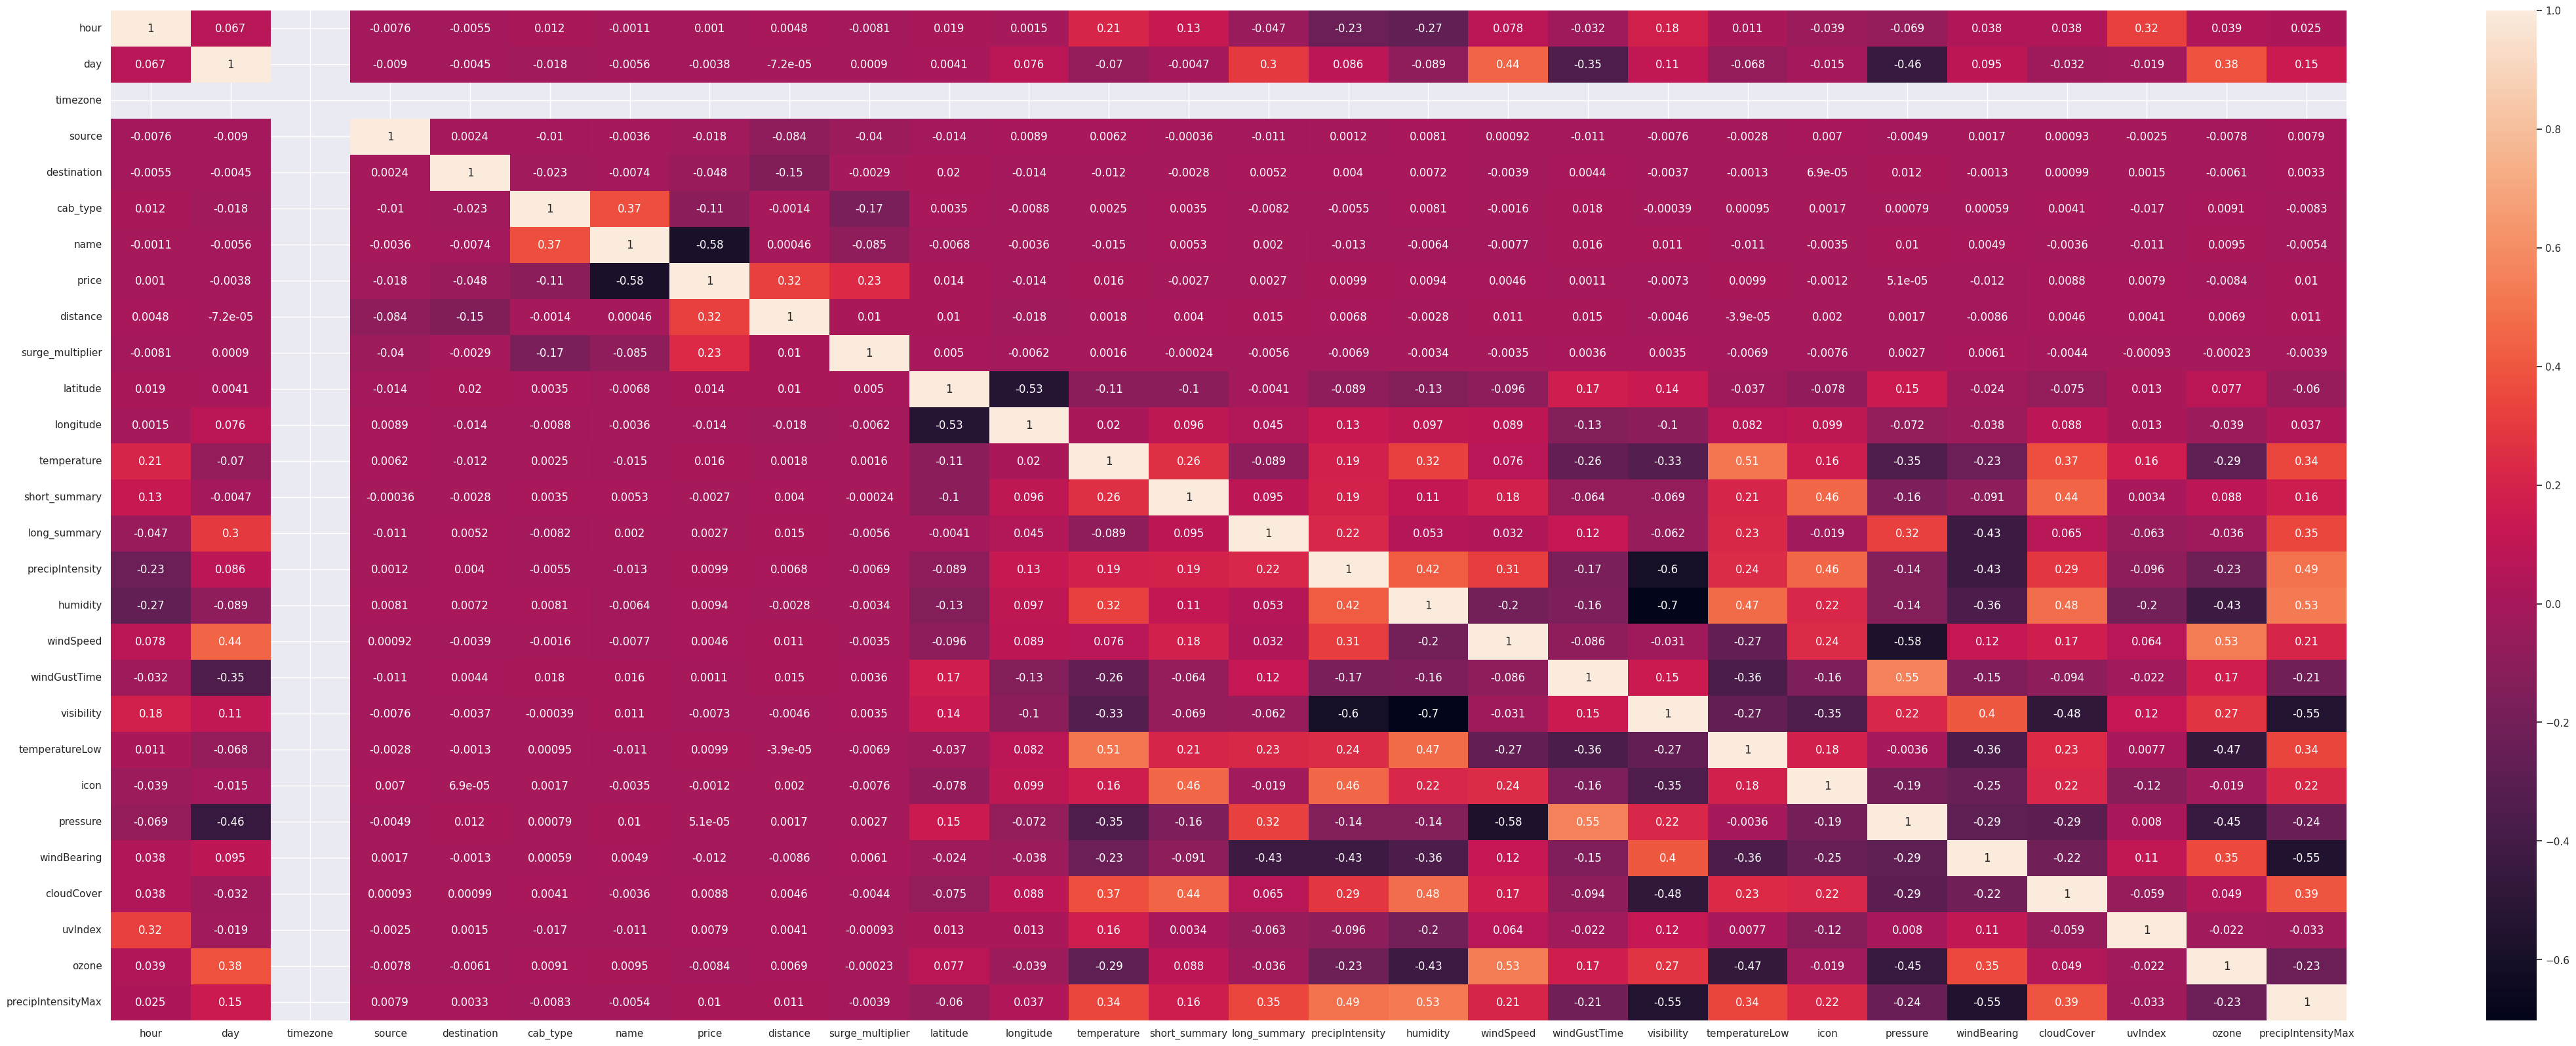

In [113]:
plt.figure(figsize=(55,20))
sns.heatmap(data.corr(),annot=True)

In [114]:
## Numerical Pipline
num_pipline = Pipeline(
    steps=[
        ("imputer",SimpleImputer(strategy="median")),
        ("scaler",StandardScaler())
    ]
)

cato_pipline = Pipeline(
    steps=[
        ("imputer",SimpleImputer(strategy="most_frequent")),
        ("scaler",StandardScaler())
    ]
)

# Create Preprocessor object
preprocessor = ColumnTransformer([
    ("num_pipline",num_pipline,numerical_features),
    ("cato_pipline",cato_pipline,catigorical_features)
])

In [115]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)

In [116]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [117]:
forest = RandomForestRegressor(n_estimators=300,max_depth=30,max_samples=10,max_leaf_nodes=8)
forest.fit(X_train,y_train)

RandomForestRegressor(max_depth=30, max_leaf_nodes=8, max_samples=10,
                      n_estimators=300)

In [118]:
forest.score(X_train,y_train)

0.3799860490193002

In [119]:
y_pred = forest.predict(X_test)

In [120]:
model_evaluation(y_test,y_pred)

(46.72163348818683, 6.835322486041667, 5.373937581473814, 0.3920721650856701)

Q-6. Imagine you have a dataset where you have predicted loan Eligibility using any
4 different classification algorithms. Now you have to build a model which can
predict loan Eligibility and you need to find the accuracy of the model and built-in
docker and use some library to display that in frontend
Dataset This is the Dataset You can use this dataset for this question.

In [121]:
data = pd.read_csv("Loan_Train.csv")

In [122]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [123]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [124]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [125]:
import statistics as st
data["Gender"] = data["Gender"].fillna(st.mode(data["Gender"]))
data["Married"] = data["Married"].fillna(st.mode(data["Married"]))
data["Self_Employed"] = data["Self_Employed"].fillna(st.mode(data["Self_Employed"]))

In [126]:
data["LoanAmount"] = data["LoanAmount"].fillna(np.nanmedian(data["LoanAmount"]))
data["Loan_Amount_Term"] = data["Loan_Amount_Term"].fillna(np.nanmedian(data["Loan_Amount_Term"]))
data["Credit_History"] = data["Credit_History"].fillna(np.nanmedian(data["Credit_History"]))

In [127]:
data.drop(["Loan_ID","Dependents"],axis=1,inplace=True)

In [129]:
categorical_features = data.select_dtypes(include="object").columns
numerical_features = data.select_dtypes(exclude="object").columns
print(categorical_features)
print(numerical_features)

Index(['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area',
       'Loan_Status'],
      dtype='object')
Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')


In [130]:
from sklearn.preprocessing import LabelEncoder
lable = LabelEncoder()

for i in catigorical_features:
    data[i] = lable.fit_transform(data[i])

In [131]:
data

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,1,1,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,1,1,0,0,7583,0.0,187.0,360.0,1.0,2,1


<Axes: >

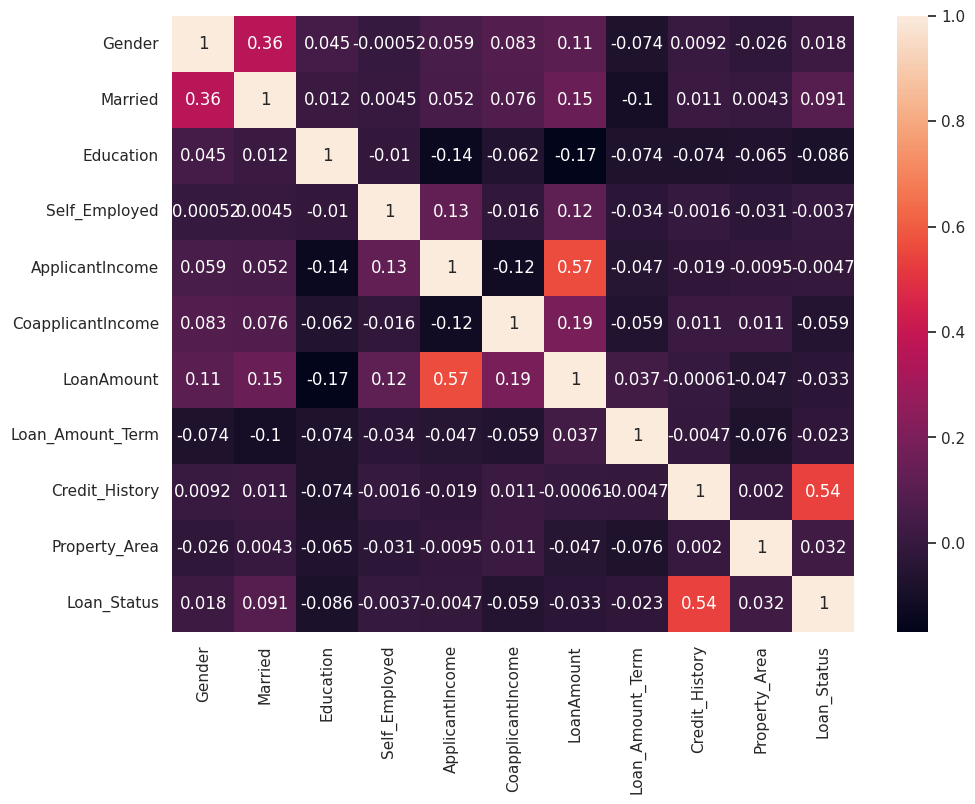

In [132]:
sns.heatmap(data.corr(),annot=True)

In [133]:
x = data.drop("Loan_Status",axis=1)
y = data["Loan_Status"]

In [135]:
categorical_features = x.select_dtypes(include="object").columns
numerical_features = x.select_dtypes(exclude="object").columns
print(categorical_features)
print(numerical_features)

Index([], dtype='object')
Index(['Gender', 'Married', 'Education', 'Self_Employed', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
       'Property_Area'],
      dtype='object')


In [136]:
## Numerical Pipline
num_pipline = Pipeline(
    steps=[
        ("imputer",SimpleImputer(strategy="median")),
        ("scaler",StandardScaler())
    ]
)

cato_pipline = Pipeline(
    steps=[
        ("imputer",SimpleImputer(strategy="most_frequent")),
        ("scaler",StandardScaler())
    ]
)

# Create Preprocessor object
preprocessor = ColumnTransformer([
    ("num_pipline",num_pipline,numerical_features),
    ("cato_pipline",cato_pipline,catigorical_features)
])

In [137]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)

In [138]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [139]:
logistic = LogisticRegression(class_weight="balanced",C=10)
logistic.fit(X_train,y_train)

LogisticRegression(C=10, class_weight='balanced')

In [140]:
logistic.score(X_train,y_train)

0.7780040733197556

In [141]:
y_pred = logistic.predict(X_test)

In [142]:
accuracy_score(y_test,y_pred)

0.7642276422764228

In [143]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.44      0.57        43
           1       0.76      0.94      0.84        80

    accuracy                           0.76       123
   macro avg       0.77      0.69      0.70       123
weighted avg       0.77      0.76      0.74       123



In [144]:
tree = DecisionTreeClassifier()
bagging = BaggingClassifier(tree,n_estimators=50,max_samples=8)
bagging.fit(X_train,y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), max_samples=8,
                  n_estimators=50)

In [145]:
bagging.score(X_train,y_train)

0.814663951120163

In [146]:
y_pred = bagging.predict(X_test)

In [147]:
accuracy_score(y_test,y_pred)

0.7886178861788617

In [148]:
#Adaboost
from sklearn.ensemble import AdaBoostClassifier
adaboost = AdaBoostClassifier(n_estimators=150,learning_rate=0.1)
adaboost.fit(X_train,y_train)

AdaBoostClassifier(learning_rate=0.1, n_estimators=150)

In [149]:
adaboost.score(X_train,y_train)

0.8289205702647657

In [150]:
y_pred = adaboost.predict(X_test)

In [151]:
accuracy_score(y_test,y_pred)

0.7967479674796748

In [152]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.42      0.59        43
           1       0.76      1.00      0.86        80

    accuracy                           0.80       123
   macro avg       0.88      0.71      0.73       123
weighted avg       0.85      0.80      0.77       123



In [153]:
#Randomforest
forest = RandomForestClassifier(n_estimators=120,max_depth=8,class_weight="balanced",max_samples=2,max_leaf_nodes=3)
forest.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=8, max_leaf_nodes=3,
                       max_samples=2, n_estimators=120)

In [154]:
forest.score(X_train,y_train)

0.6965376782077393

In [155]:
y_pred = forest.predict(X_test)

In [156]:
accuracy_score(y_test,y_pred)

0.6504065040650406

In [157]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        43
           1       0.65      1.00      0.79        80

    accuracy                           0.65       123
   macro avg       0.33      0.50      0.39       123
weighted avg       0.42      0.65      0.51       123



Q-7. Imagine you have a dataset where you need to predict the Genres of Music
using
an Unsupervised algorithm and you need to find the accuracy of the model, built-in
docker, and use some library to display that in frontend
Dataset This is the Dataset You can use this dataset for this question

In [158]:
data = pd.read_csv("data.csv")

In [159]:
data

,filename,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,blues.00081.au,103.359375,50,0.380260,0.248262,2116.942959,1956.611056,4196.107960,0.127272,-26.929785,107.334008,-46.809993,40.932634,-21.463776,24.816275,-18.945571,15.253459,-15.050104,12.262823,-15.234050,14.336612,-13.821769,7.562789,-6.181372,0.330165,-6.829571,0.965922,-7.570825,2.918987,blues
1,blues.00022.au,95.703125,44,0.306451,0.113475,1156.070496,1497.668176,2170.053545,0.058613,-233.860772,136.170239,3.289490,48.931193,8.699106,13.954752,5.359449,0.381334,-13.490265,16.871769,5.145258,-2.250578,3.959198,5.322555,0.812028,-1.107202,-4.556555,-2.436490,3.316913,-0.608485,blues
2,blues.00031.au,151.999081,75,0.253487,0.151571,1331.073970,1973.643437,2900.174130,0.042967,-221.802549,110.843070,18.620984,30.922996,3.291330,22.587447,-20.418303,12.120995,-26.347956,-4.356270,-26.406674,-13.037723,-12.652228,-1.821905,-7.260097,-6.660252,-14.682694,-11.719264,-11.025216,-13.387260,blues
3,blues.00012.au,184.570312,91,0.269320,0.119072,1361.045467,1567.804596,2739.625101,0.069124,-207.208080,132.799175,-15.438986,60.986727,0.725807,12.437828,1.183836,-1.540779,-17.888154,8.358496,-2.452068,-0.613248,0.384877,2.605128,-5.188924,-9.527455,-9.244394,-2.848274,-1.418707,-5.932607,blues
4,blues.00056.au,161.499023,74,0.391059,0.137728,1811.076084,2052.332563,3927.809582,0.075480,-145.434568,102.829023,-12.517677,56.993472,2.271347,26.591402,-4.274803,17.338809,-7.985593,15.235427,-6.934599,7.457218,-10.470444,-2.360483,-6.783623,2.671134,-4.760879,-0.949005,0.024832,-2.005315,blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,rock.00017.au,123.046875,59,0.418812,0.166056,2312.030070,2060.825761,4528.197619,0.140588,-41.402023,105.403012,-43.945538,54.100395,-18.411090,23.520838,-17.607988,20.660727,-18.454381,17.475770,-15.174259,11.303100,-14.155566,2.824157,-9.477822,3.331261,-8.200088,3.693091,-3.673562,-0.163201,rock
996,rock.00081.au,117.453835,56,0.335774,0.093676,2553.856706,2219.090892,5123.752351,0.136173,-121.410791,89.522283,-33.497073,41.974745,-25.936361,23.026082,-20.271538,14.354429,-16.350707,17.039462,-16.957086,9.149520,-10.112054,4.211237,-9.349345,1.609701,-10.553566,1.066489,-1.654875,7.544224,rock
997,rock.00004.au,103.359375,45,0.372834,0.208743,1345.850763,1841.748033,2939.265560,0.041099,-127.946876,134.443879,1.027332,54.440979,-0.464906,35.829542,-10.860896,16.383278,-10.030961,6.602061,-6.700004,11.043714,-8.385375,2.111019,-6.338260,0.997383,-5.325869,-0.842192,-4.665996,-4.787677,rock
998,rock.00006.au,112.347147,45,0.344472,0.180163,1675.475369,1653.422860,3253.563659,0.087294,-98.356322,136.611573,-46.700574,46.457300,-17.135585,10.505286,-14.554871,16.543108,-12.317913,3.689543,-12.647550,2.945863,-12.509212,0.091337,-0.774780,-5.700102,-8.630916,-1.903803,-2.196753,-3.395148,rock


In [160]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   filename            1000 non-null   object 
 1   tempo               1000 non-null   float64
 2   beats               1000 non-null   int64  
 3   chroma_stft         1000 non-null   float64
 4   rmse                1000 non-null   float64
 5   spectral_centroid   1000 non-null   float64
 6   spectral_bandwidth  1000 non-null   float64
 7   rolloff             1000 non-null   float64
 8   zero_crossing_rate  1000 non-null   float64
 9   mfcc1               1000 non-null   float64
 10  mfcc2               1000 non-null   float64
 11  mfcc3               1000 non-null   float64
 12  mfcc4               1000 non-null   float64
 13  mfcc5               1000 non-null   float64
 14  mfcc6               1000 non-null   float64
 15  mfcc7               1000 non-null   float64
 16  mfcc8  

In [161]:
data.drop("filename",axis=1,inplace=True)

In [162]:
data.isnull().sum()

tempo                 0
beats                 0
chroma_stft           0
rmse                  0
spectral_centroid     0
spectral_bandwidth    0
rolloff               0
zero_crossing_rate    0
mfcc1                 0
mfcc2                 0
mfcc3                 0
mfcc4                 0
mfcc5                 0
mfcc6                 0
mfcc7                 0
mfcc8                 0
mfcc9                 0
mfcc10                0
mfcc11                0
mfcc12                0
mfcc13                0
mfcc14                0
mfcc15                0
mfcc16                0
mfcc17                0
mfcc18                0
mfcc19                0
mfcc20                0
label                 0
dtype: int64

In [163]:
data.duplicated().sum()

13

In [164]:
data.drop_duplicates(inplace=True)

In [165]:
data["label"].value_counts()

blues        100
classical    100
country      100
jazz         100
rock         100
disco         99
reggae        99
hiphop        98
pop           98
metal         93
Name: label, dtype: int64

In [166]:
categorical_features = data.select_dtypes(include="object").columns
numerical_features = data.select_dtypes(exclude="object").columns
print(categorical_features)
print(numerical_features)

Index(['label'], dtype='object')
Index(['tempo', 'beats', 'chroma_stft', 'rmse', 'spectral_centroid',
       'spectral_bandwidth', 'rolloff', 'zero_crossing_rate', 'mfcc1', 'mfcc2',
       'mfcc3', 'mfcc4', 'mfcc5', 'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10',
       'mfcc11', 'mfcc12', 'mfcc13', 'mfcc14', 'mfcc15', 'mfcc16', 'mfcc17',
       'mfcc18', 'mfcc19', 'mfcc20'],
      dtype='object')


In [167]:
from sklearn.preprocessing import LabelEncoder
lable = LabelEncoder()

for i in catigorical_features:
    data[i] = lable.fit_transform(data[i])

<Axes: >

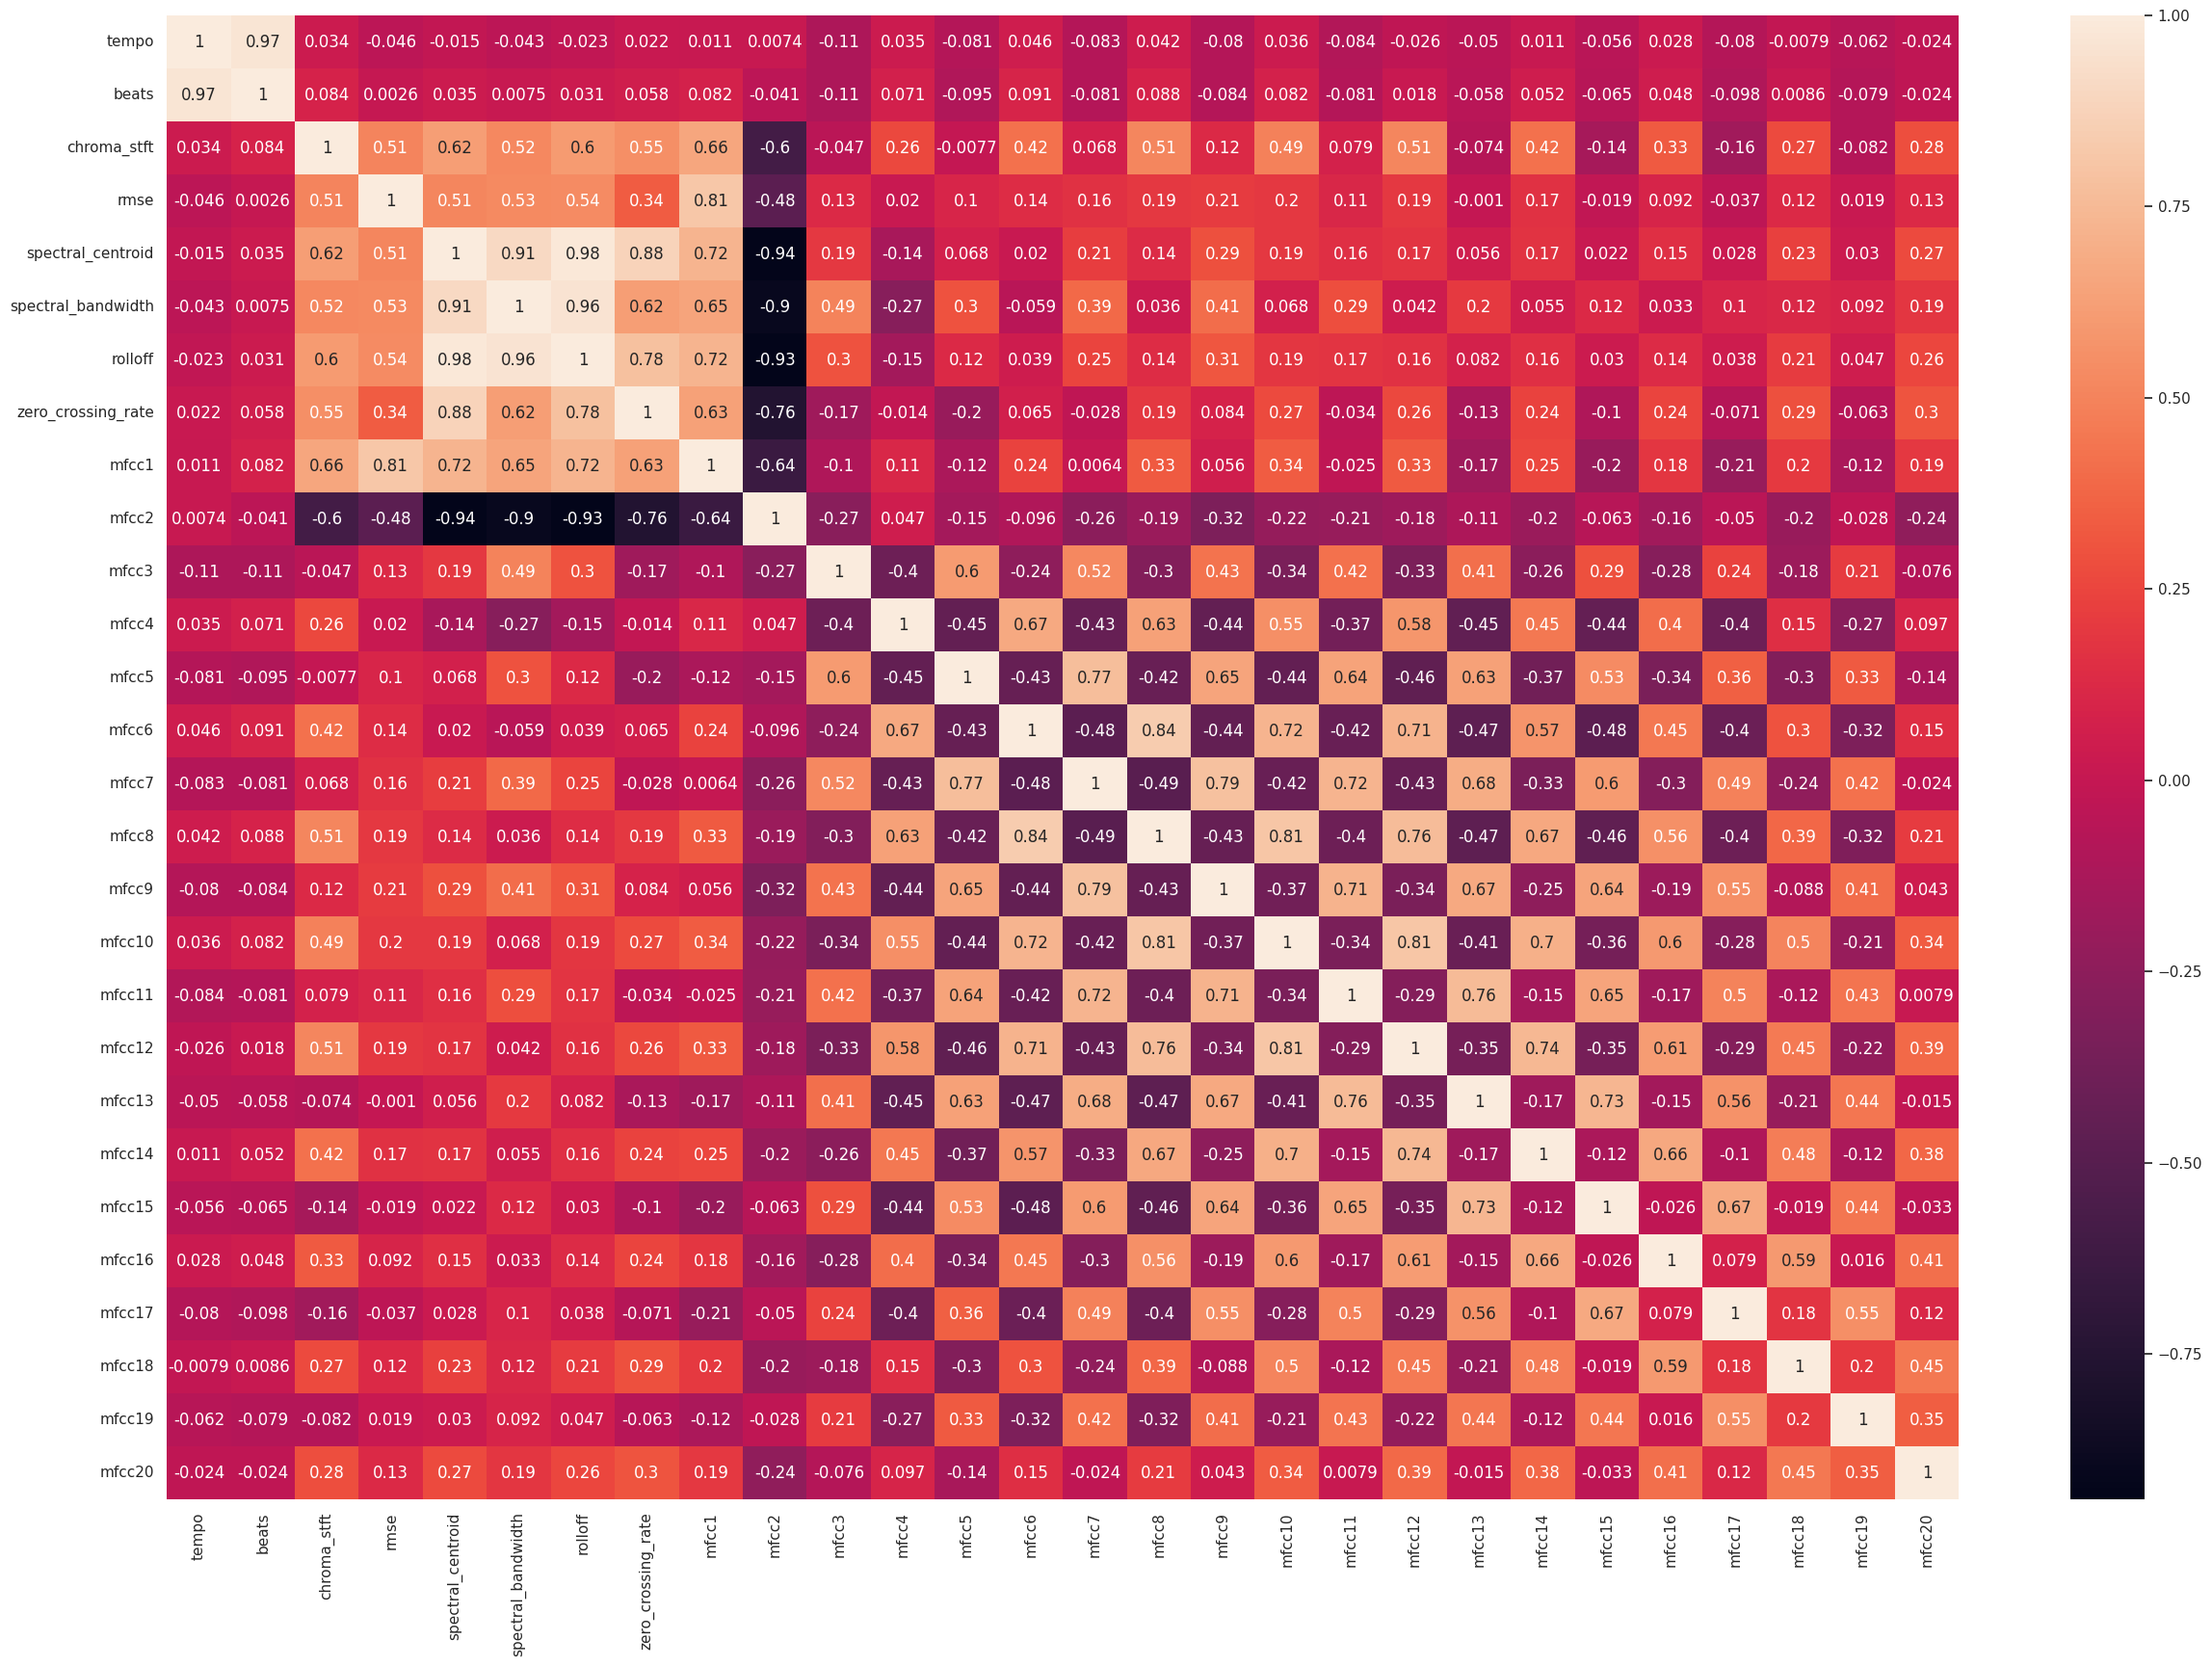

In [168]:
plt.figure(figsize=(30,20))
sns.heatmap(data.corr(),annot=True)

In [169]:
x = data.drop('label',axis=1)
y = data['label']

In [170]:
categorical_features = x.select_dtypes(include="object").columns
numerical_features = x.select_dtypes(exclude="object").columns
print(categorical_features)
print(numerical_features)

Index([], dtype='object')
Index(['tempo', 'beats', 'chroma_stft', 'rmse', 'spectral_centroid',
       'spectral_bandwidth', 'rolloff', 'zero_crossing_rate', 'mfcc1', 'mfcc2',
       'mfcc3', 'mfcc4', 'mfcc5', 'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10',
       'mfcc11', 'mfcc12', 'mfcc13', 'mfcc14', 'mfcc15', 'mfcc16', 'mfcc17',
       'mfcc18', 'mfcc19', 'mfcc20'],
      dtype='object')


In [171]:
## Numerical Pipline
num_pipline = Pipeline(
    steps=[
        ("imputer",SimpleImputer(strategy="median")),
        ("scaler",StandardScaler())
    ]
)

cato_pipline = Pipeline(
    steps=[
        ("imputer",SimpleImputer(strategy="most_frequent")),
        ("scaler",StandardScaler())
    ]
)

# Create Preprocessor object
preprocessor = ColumnTransformer([
    ("num_pipline",num_pipline,numerical_features),
    ("cato_pipline",cato_pipline,catigorical_features)
])

In [172]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)

In [173]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [174]:
logistic = LogisticRegression(class_weight="balanced",C=10)
logistic.fit(X_train,y_train)

LogisticRegression(C=10, class_weight='balanced')

In [175]:
logistic.score(X_train,y_train)

0.7401774397972116

In [176]:
y_pred = logistic.predict(X_test)

In [177]:
accuracy_score(y_test,y_pred)

0.5959595959595959

In [178]:
from sklearn.ensemble import GradientBoostingClassifier
# gredient boosting
gb = GradientBoostingClassifier()
gb.fit(X_train,y_train)

GradientBoostingClassifier()

In [179]:
gb.score(X_train,y_train)

0.9987325728770595

In [180]:
y_pred = gb.predict(X_test)

In [181]:
accuracy_score(y_test,y_pred)

0.6363636363636364